# [Prompt란?](https://codingsmu.tistory.com/162)

- ChatGPT를 사용해 과제나 리포트 작성을 할 때, 원하는 방향으로 답변이 나오도록 여러가지 입력을 준 경험이 한 번씩 있다면, "프롬프트(Prompt)를 잘 줘야 ChatGPT가 대답을 잘해줘"라는 말을 들은 경험도 있을 것입니다.
- 즉, 프롬프트(Prompt)란 ChatGPT 모델이 사용자가 원하는 답변을 내뱉기 위해 주는 적절한 입력값입니다.

이러한 프롬프트(Prompt)를 사용해서 모델의 추론/학습에 관여하는 `프롬프트 엔지니어링(Prompt Engineering)`, `프롬프트 튜닝(Prompt Tuning)` 등이 활발히 연구되고 있습니다.

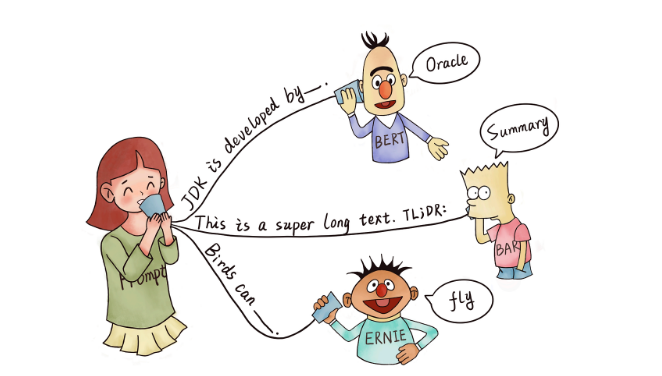

## 프롬프트 생성 방법
- 프롬프트 생성방법에 따라 크게 Manual-Search Prompt 또는 Auto-Search Prompt로 나눌 수 있습니다.

### Manual-Search Prompt

- 초기에는 주로 메뉴얼한 방식으로 각 테스크마다 적절한 프롬프트를 찾아주었는데, 대포적인 예로는 `PET(Schick and Schutze., EACL'20)`에서 사용한 Verbalizer를 들 수 있습니다.
- 감성분석(Sentiment Classification) 테스크를 BERT, RoBERTa와 같은 Masked Language Model(MLM) 기반의 사전학습 모델에서 수행한다고 할 때, 기존에는 "Best pizza ever!"만을 가지고 긍정적인 감정임을 학습해야 했습니다.
- 그러나, 해당 논문에서는 기존 입력과 함께 "It was [MASK]"라는 탬플릿을 모델에게 주어 [MASK]에 등장해야 하는 단어가 긍정 단어인 great로 예측될 확률을 높이며 학습하게 하였습니다.

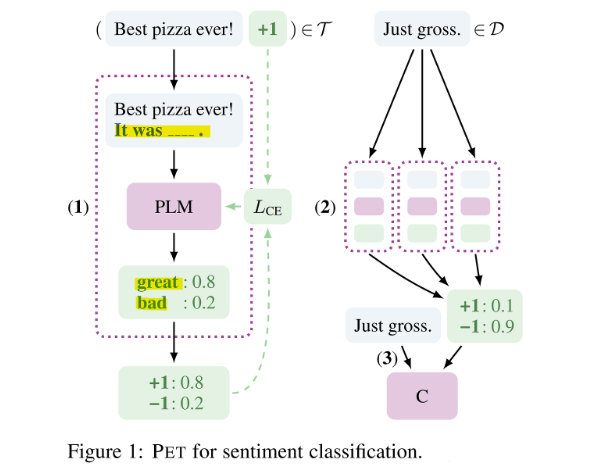

### Auto-Search Prompt

- Manual-Search Prompt의 경우 직관적이고, 모델 학습에 효과적이지만 적절한 프롬프트를 찾기까지에 시간이 많이들고, 프롬프트를 생성할 사람에 따라 편차가 크다는 문제점이 있습니다.
- 이에 자동적으로 프롬프트를 찾는 방법인 Auto-Search Prompt가 연구되기 시작했습니다.
- 대표적인 논문으로 `AutoPrompt(Shin et al., EMNLP'20)`가 있습니다. 감정 분석 테스크를 MLM 기반의 모델에서 수행한다고 할 때, PET 논문에서는 직접 사람이 테스크마다 프롬프트를 정의했지만, AutoPrompt에서는 정답 레이블의 확률이 가장 높아지는 토큰을 찾아 이를 프롬프트로 정의합니다.

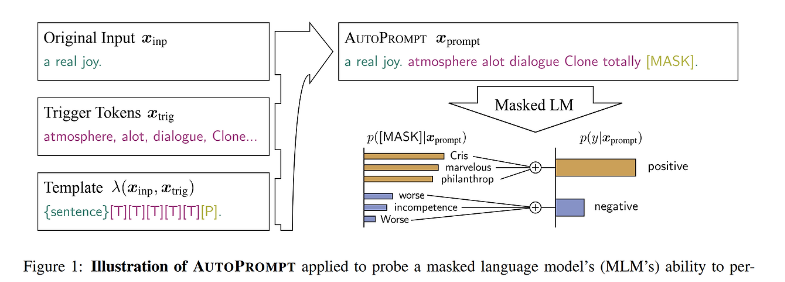

## 프롬프트의 형태에 따른 학습 방법

### Hard Prompt vs. Soft Prompt

- 프롬프트는 크게 Hard Prompt와 Soft Prompt로 나눌 수 있습니다.
- Hard Prompt는 자연어 형태의 이산적인(Discrete) 값을 가지며, Soft Prompt는 실수(혹은 실수 값으로 구성된 벡터)로 이루어진 연속적인(Continuous) 값을 가집니다.
- 언어모델은 이산적인 값이 아닌 연속적인 값으로 학습되기 때문에 Hard Prompt는 최적화되지 않은 단점이 있습니다.
- 반면, Soft Prompt는 input 앞에 튜닝이 가능한 임베딩 조각(tunable piece of embedding)이 붙게 됩니다. 이 임베딩 조각은 실수(Real Number)로 이루어진 연속적인(Continuous) 값으로 학습되고, 기존의 Hear Prompt 학습에 비해 더 효과적인 학습이 가능합니다.

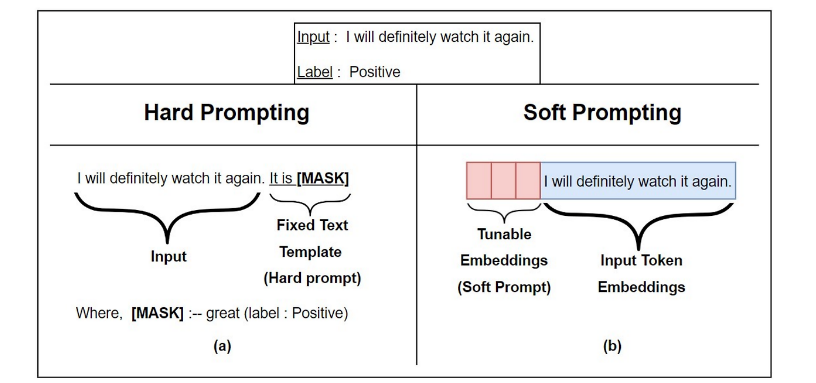

### Sfot Prompt + Frozen Pre-trained Model
> 대표적인 연구로는 `Prompt Tuning`과 `Prefix Tuning`이 있습니다.
> 두 논문 모두 Soft Prompt를 이용해 기존의 파인튜닝 대비 효과적인 학습이 가능하다는 점을 주요 포인트로 하고 있습니다.

- Prompt Tuning(그림 A)
  - 사전학습모델(Pre-trained Model)을 이용하여 A, B, C 테스크를 수행한다고 할 때, 기존의 Model Tuning 방법과 제안 방법인 Prompt Tuning을 비교해서 보여주고 있습니다.
  - 기존 방법의 경우 세 가지 테스크를 수행하기 위해 사전학습 모델 전체의 task-specific한 카피 본을 테스크 개수 만큼 만들고, 추론 역시 개별 batch에서 수행해야하는 문제점이 있습니다.
- Prefix Tuning(그림 B)
  - 다양한 테스크를 수행한다고 할 때 기존 Fine-tuning 방법은 각 테스크마다 모델 전체 파라미터를 업데이트 해야한다는 문제점을 이야기하고 있습니다.

두 논문에서는 학습 가능한 Soft Prompt를 이용하여 테스크마다 개별로 모델 전체 파라미터를 업데이트 할 필요없이 프롬프트만 업데이트하여 효율적인 학습을 가능하게 했습니다.

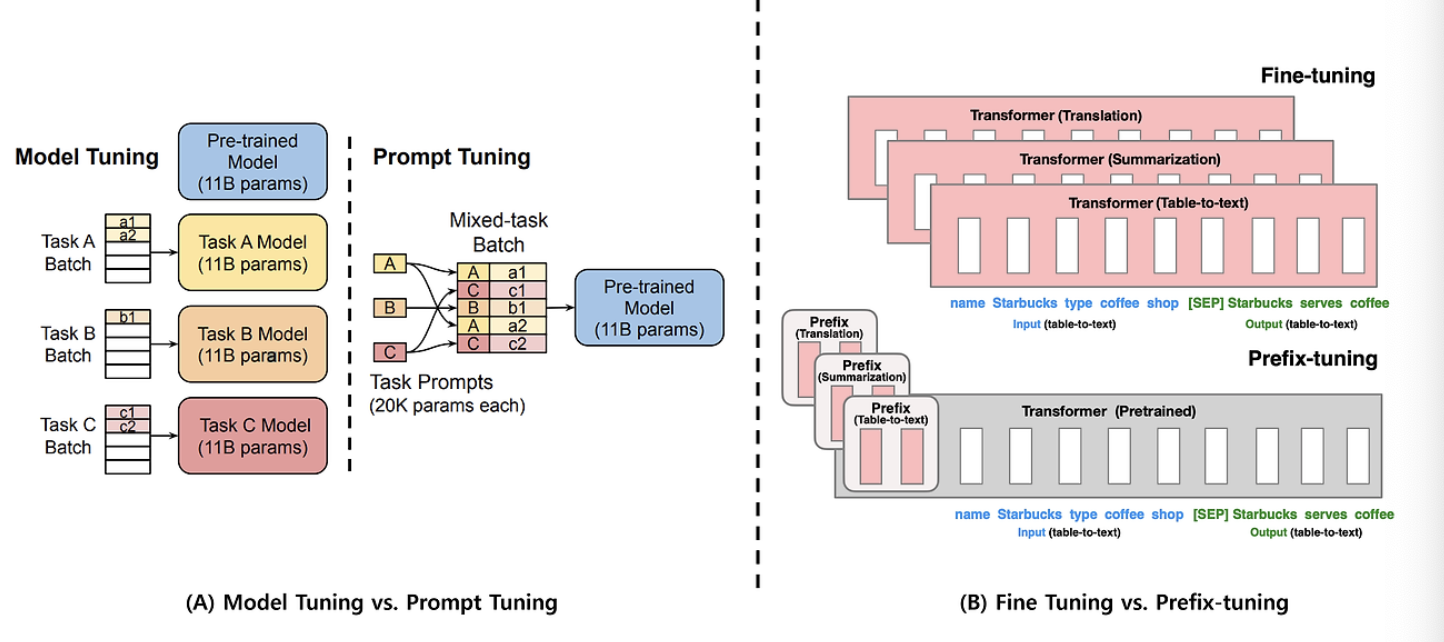

# [Prompt-Based Learning](https://codingsmu.tistory.com/153)

- 모델에 들어가는 입력 데이터(input data)를 사람이 읽을 수 있는 설명(human readable instructions)으로 잘 작성된 텍스트와 연결하여 수정하게 되는데, 이때 만들어지는 텍스트를 프롬프트(prompt)라고 합니다.
- 프롬프트는 task-specific하게 훈련되지 않아도 사전학습 언어모델(PLM, Pre-trained Language Model)이 새로운 테스크(e.g. 질의응답, 기계번역 등)에 대해서 잘 수행되도록 합니다.
- 즉, 단지 자연어로 모델이 어떤 일을 수행해야 할지 알려주는 것만으로도 별도의 추가훈련 없이 새로운 테스크를 좋은 성능으로 수행할 수 있습니다.

따라서 Prompt-based learning 목적은 프롬프트의 도움을 받아 사전학습된 지식을 최대한 활용하자입니다.

### Prompt-based Learning Method

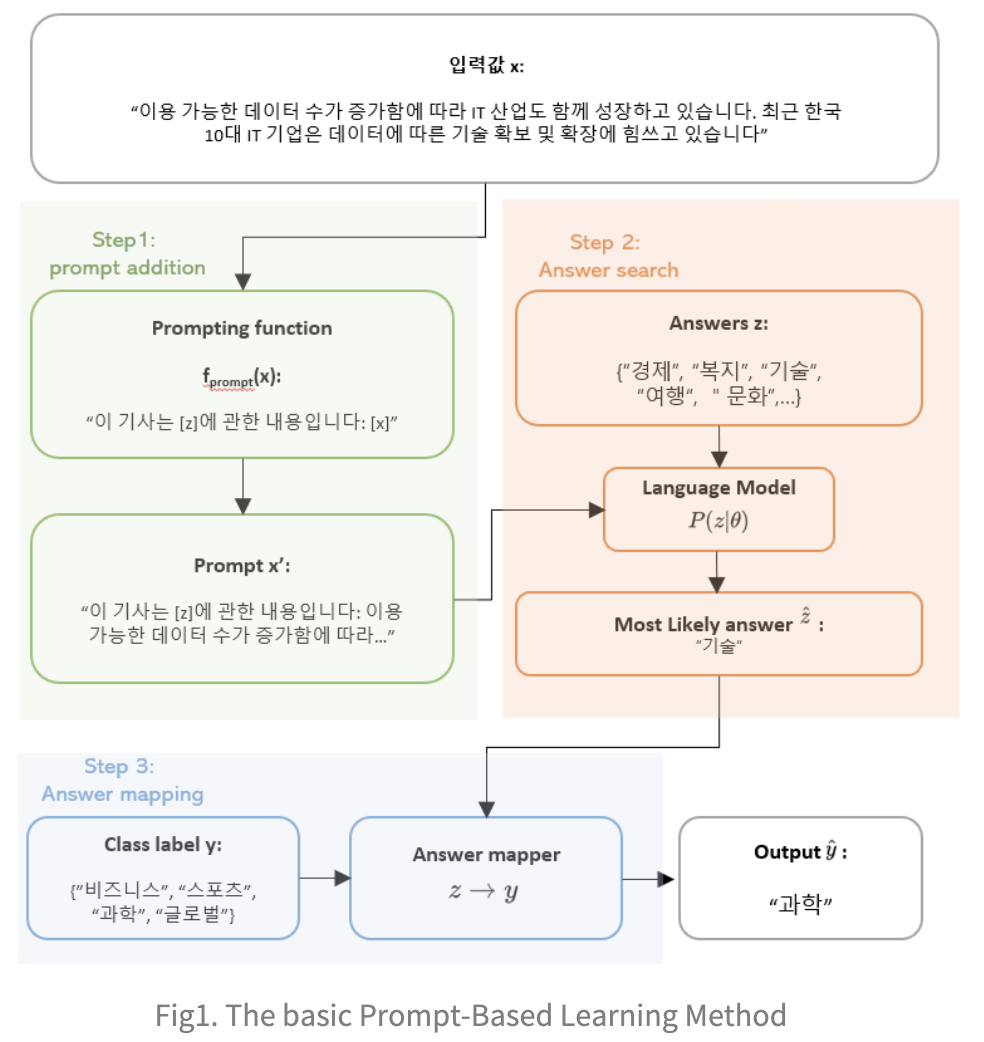

#### Step1: Prompt Addition

- 먼저 기존의 입력값(x)가 prompt function을 통과하게 되면, 사전에 정의해둔 패턴 형식인 prompt x'로 바뀌게 됩니다.
  - 이때 사전에 정의해둔 형태를 prompt template이라고 하게 됩니다.
- 해당 template은 언어모델이 특정 테스크를 풀 수 있도록 기존의 입력값 형태를 바꿔주는 것을 말합니다.
  - 예로 언어모델이 MLM(Masked Language Model) 기반이라면 입력값이 적절한 변형과 `<MASK>` 토큰을 넣어주게 됩니다.

#### Step2: Answer Search

- prompt function을 통과한 값 x'은 언어모델을 통해 prediction되며 결과는 언어모델의 vocab에 존재하는 단어인 z로 나오게 됩니다.

#### Step3: Answer Mapping

- 해당 값 z를 테스크의 레이블링 값으로 변환해주는 과정을 거쳐 최종 아웃풋인 y를 얻게 됩니다.

## Prompt Based Learning의 필요성

NLP의 이전 패러다임은 "Pre-train, Fine-tune"이었습니다. 언어모델을 사전학습(pre-train)하고 다운스트림 테스크를 위해 추가 학습데이터를 사용하여 파인튜닝(fine-tune)을 거쳤습니다.
- 자연어처리와 딥러닝 분야의 전문가들은 "어떻게 우리는 언어모델을 파인튜닝할까?"라는 질문에 초점을 맞춰왔습니다.
- 파인튜닝은 레이블링된 데이터가 필요한 supervised task로 데이터를 직접 구축 시에는 많은 비용이 들고 무료로 이용한 데이터는 한정적입니다.

Prompt Based Learning은 다음의 질문에 초점을 맞춥니다.
- 어떻게 언어모델의 입력값을 디자인해야하는가?
- 이에 대한 답변은 추가적인 파인튜닝 없이 사전학습모델이 새로운 테스크를 수행할 수 있도록 하는 것입니다.
- 즉 이방법은 레이블링 데이터가 추가적으로 더 필요한 상황을 막는 것입니다.

파인튜닝 없이 언어모델을 사용할 때 이를 `Zero-/Few-shot learning`이라고 합니다.
- 이는 prediction을 위해 사용되는 추가 학습데이터가 매우 적거나(few), 아예 필요하지 않기(zero) 때문입니다.
- T5(Text-to-Text transfer Transformer)와 같은 파인튜닝된 작은 모델이 더 큰 few-shot 모델인 GPT-3를 SuperGLUE와 같은 NLP 벤치마크를 넘어서는 모습을 보입니다.
- 하지만 추가 데이터의 필요성을 제거하는 것은 많으 응용환경에서 Prompt-based learning을 선호하게 만들 수 있는 장점입니다.

# [GPT-3 (Language Models are Few-Shot Learners)](https://velog.io/@mmodestaa/GPT-3-%EB%93%B1%EC%9E%A5%EA%B3%BC-%EA%B7%B8-%ED%9B%84-Prompting-and-Promt-Tuning-Prefix-Tuning-P-Tuning#gpt-3-language-models-are-few-shot-learners)
- OpenAI가 발표한 GPT-3는 어마어마한 규모와 더불어 뛰어난 성능을 자랑함
- `in-context learning`과 `prompting`이라는 새로운 패러다임을 제시

## Traditional | Fine-tuning (파인튜닝)

- 파인튜닝이란 원하는 태스크에 특화된 지도학습 데이터셋을 학습시킴으로써 사전학습된 모델(Large Pretrained Language Model)의 가중치(weight)을 업데이트하는 방법
  - 가중치를 업데이트한다는 것은, 원하는 태스크에 맞는 언어적 특징을 학습한다는 것을 의미
  - 태스크 예시: 감정분석, 기계번역, 요약, 질의응답 등
- 지도학습이기 때문에 정답이 라벨링이 된 굉장히 많은 수의 데이터들이 사용됨
- 굉장히 좋은 성능을 보여주지만, 여러 가지 한계가 존재
  - 매 태스크마다 새로운 큰 규모의 데이터셋이 필요
  - 일반화가 잘 되지 않는(poor generalization) 문제가 발생할 수 있음
    - 언어에 대한 일반적인 지식을 학습한 pretrained model의 파라미터를 원하는 태스크에 맞춰 조정하는 과정에서 일반화 성능이 감소할 수 있음

## In-context Learning
- 인컨텍스트 러닝이란, 언어모델의 인풋 앞에 자연어 태스크에 대한 설명과 몇 가지 예시를 더해 모델에 넣으면, 언어모델이 태스크에 맞는 아웃풋을 생성하는 새로운 학습방법
- 자연어 이해 및 생성에 있어서 언어모델의 예측을 도울 수 있도록 인풋 컨텍스트에 특별한 템플릿을 사용하는 것을 의미
- 가중치(weight)의 업데이트가 일어나지 않음
- 대량의 데이터셋이 필요하지 않음

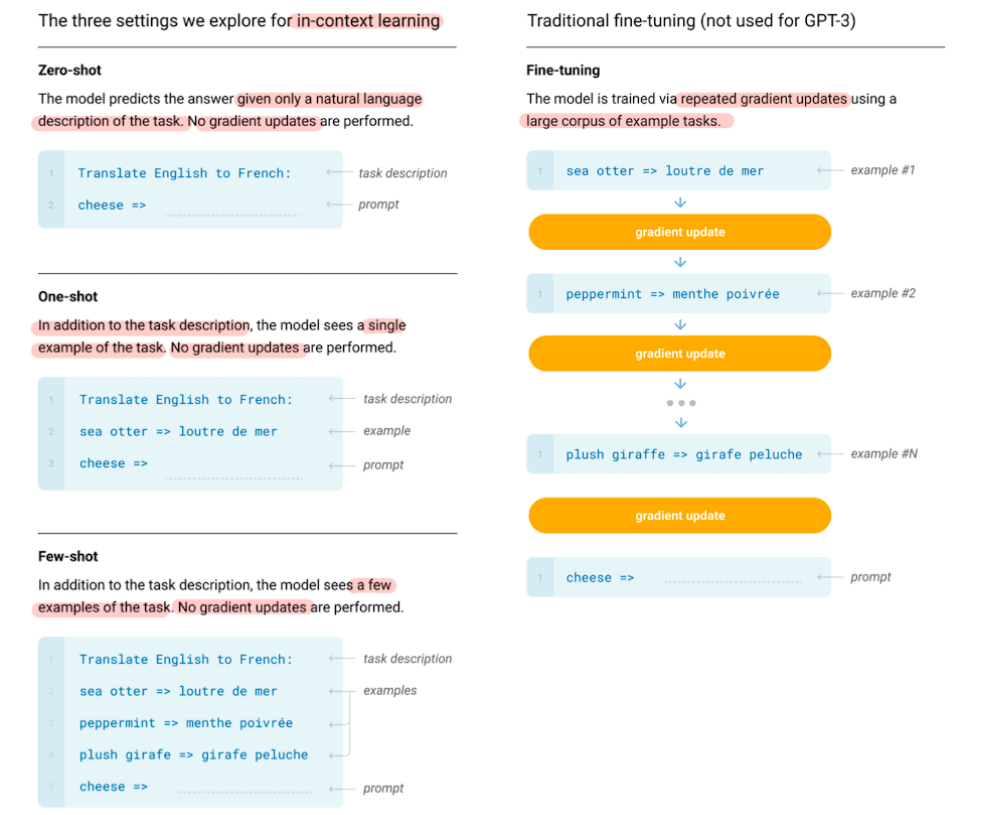

### Few-shot(2개 이상)
- 언어모델이 추론(inference)을 할 때, 태스크에 대한 몇 개의 demonstration(예시)이 주어짐
- 장점
  - 태스크에 특화된 데이터의 필요성을 감소시킴
  - 파인튜닝의 문제점으로 꼽히는 (narrow distribution의 학습으로 인한) 일반화 성능 감소의 가능성을 낮춰줌
  - 사전학습된 모델에 내재되어 있는 태스크들 사이의 넓은 분포를 학습하고(=일반화 성능을 놓치지 않으며), 새로운 태스크에 빠르게 적응
- 단점
  - SOTA(state-of-the-art) 파인튜닝에 비해 성능이 다소 떨어짐
  - 여전히 태스크 특화 데이터가 일부 필요

### One-shot(1개)
- Few-shot과 유사하지만 오직 하나의 demonstration(예시)만 허용
- 사람이 자연어 테스크를 수행하는 방식과 유사
  - 예를 들어, 우리는 "이 영화 완전 노잼"이라는 문장을 bad로 분류하라는 하나의 예시만 보더라도, 다른 여러 영화 리뷰에 대해서 "good" 혹은 "bad"로 분류할 수 있음

### Zero-shot(0개)
- demonstration(예시)이 없고, 태스크를 설명하는 자연어 설명(instruction)만 주어짐
- 굉장히 편리하지만 가장 어려우며, 1S과 마찬가지로 사람이 하는 방식과 굉장히 유사
  - 우리는 "I am a boy"라는 문장을 한국어로 번역하라 라는 instruction만 보고서도 "나는 소년이다"라는 문장을 만들어냄

## Prefix-Tuning

- Prefix Tuning은 이전의 연구에서 더 나아가, 인풋의 앞에 prefix, 즉 일련의 연속적인 태스크 특화 벡터(a sequence of continuous task-specific vectors)를 붙이는 방식
- prefix 뒤에 이어지는 토큰들은 앞에 나온 prefix를 일련의 가상의 토큰인 것처럼 attend
- prefix는 prompt와는 다르게 실제 토큰(=자연어 단어)과 대응되지 않는 free parameter
- prefix tuning의 가장 큰 장점은 NLG(자연어 생성) 태스크에서 LM(언어모델)의 파라미터 변경 없이도 모델이 적절한 컨텍스트를 취하도록 할 수 있다는 점

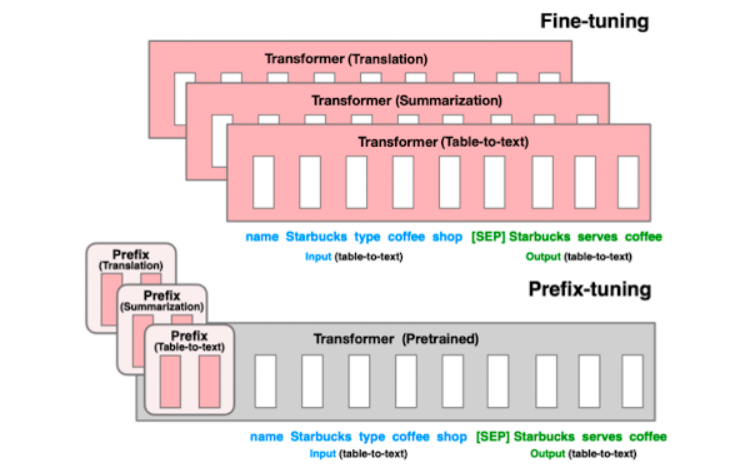

## P-Tuning

- 파란색으로 표시된 Britain이 context, 빨간색으로 표시된 [MASK]가 target, 나머지 노란색 부분이 prompt token
- P-tuning에서는 pseudo prompt와 prompt encoder가 미분가능한 방법으로 최적화
- 이러한 연속적인 토큰에 "수도(capital)"와 같은 태스크와 관련된 앵커 토큰(task-related anchor token)을 추가하면 성능이 더욱 향상

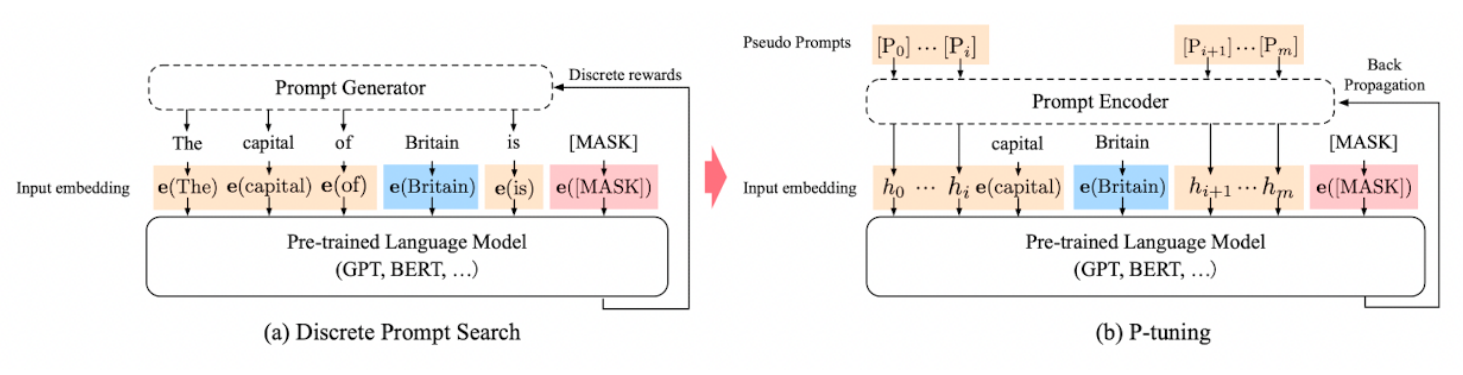

### P-tuning v2

- Prefix tuning은 원래 NLG를 위해 제안되었으나, 이 논문의 저자들은 이 구조가 NLU에도 효과적이라는 사실을 발견
- P-tuning에서 연속적인 프롬프트는 트랜스포머의 첫 번째 레이어에 인풋 임베딩에 삽입
- P-tuning v2에서는 prefix tuning처럼 multi-layer prompt(deep prompt tuning), 즉 여러 레이어에 프롬프트를 붙이는 방법을 사용
- 각기 다른 레이어에 위치한 프롬프트는 인풋 시퀀스에 prefix 토큰으로 더해지고, 다른 interlayer들과는 독립적
- 이를 통해 더 많은 수의 태스크 특화 파라미터를 튜닝, 더 깊은 레이어에 더해진 프롬프트를 통해 결과 예측에 더 직접적이고 주요한 영향

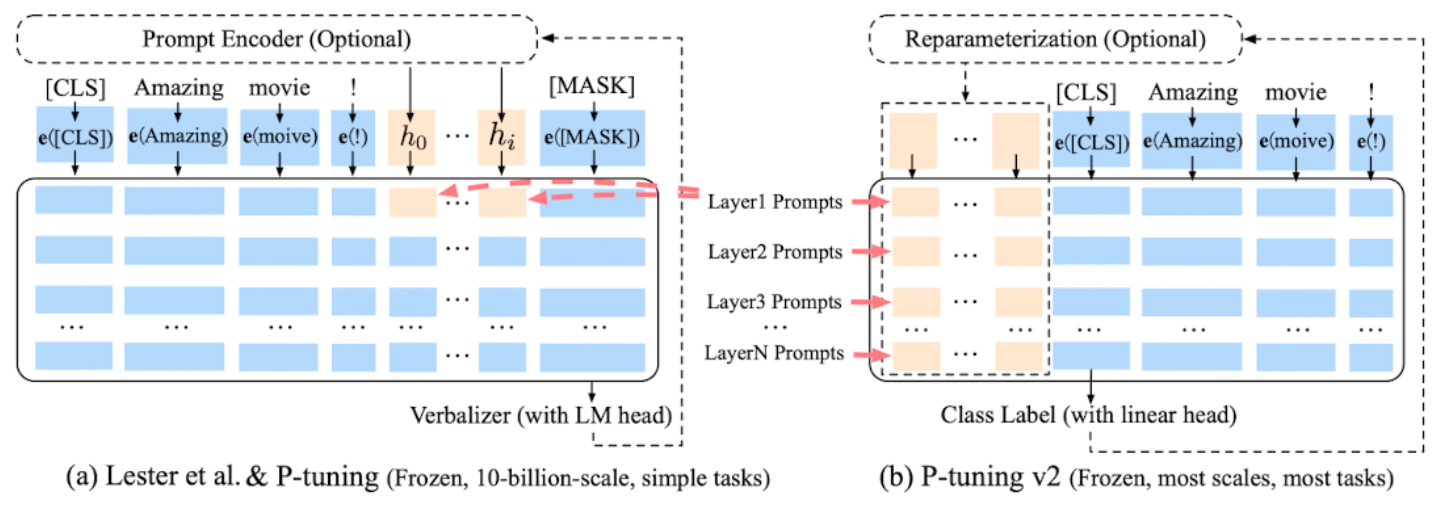

## [Prompt Tuning](https://joannekim0420.tistory.com/121)

### Model Tuning
- 기존 모델 튜닝 방식은 각각의 task에 맞게 pre-trained 된 모델들을 모두 fine-tuning하는 방식이었음.

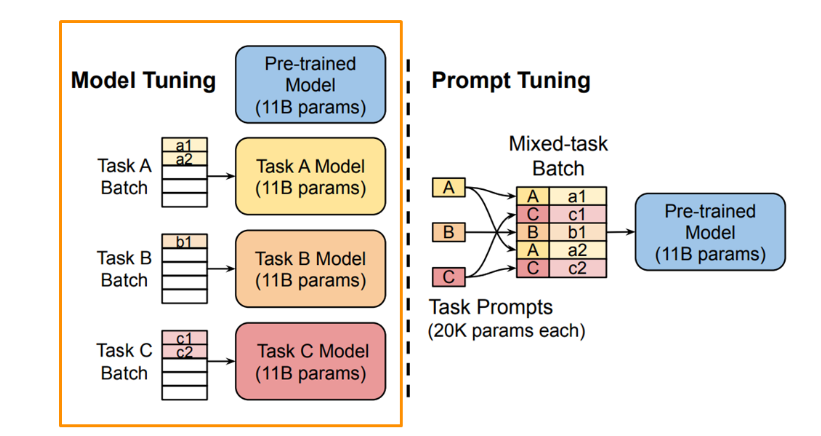

### Prompt Tuning
- input text 의 앞부분에 추가된 additional k 토큰들만 downstream 태스크에서 학습함.
- 각 태스크마다 prompt 들을 저장하여 인퍼런스에서 mixed-task 로 사용.
- GPT3 의 prompt와 달리 기존 트랜스포머 모델 파라미터는 froze 해놓고, prompt 파라미터 update 할 수 있음.

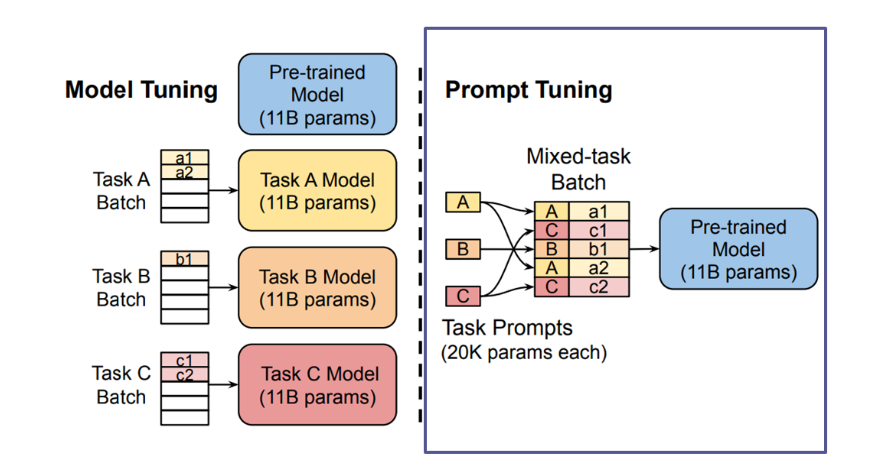

# [Prompt Engineering](https://moon-walker.medium.com/the-art-of-prompt-engneering-1-prompt-engineering%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80-4a7a88ce67c)
- 프롬프트 엔지니어링의 주요 목표는 사용자의 의도와 원하는 결과를 전달하는 프롬프트를 만들어 모델의 성능, 정확성, 유용성을 극대화하는 것이다.
- 프롬프트 엔지니어링이 필요한 이유는 현재 LLM의 동작 방식의 한계와 인간과 컴퓨터의 상호 작용을 위해 자연어를 사용하고 있기 때문이다.

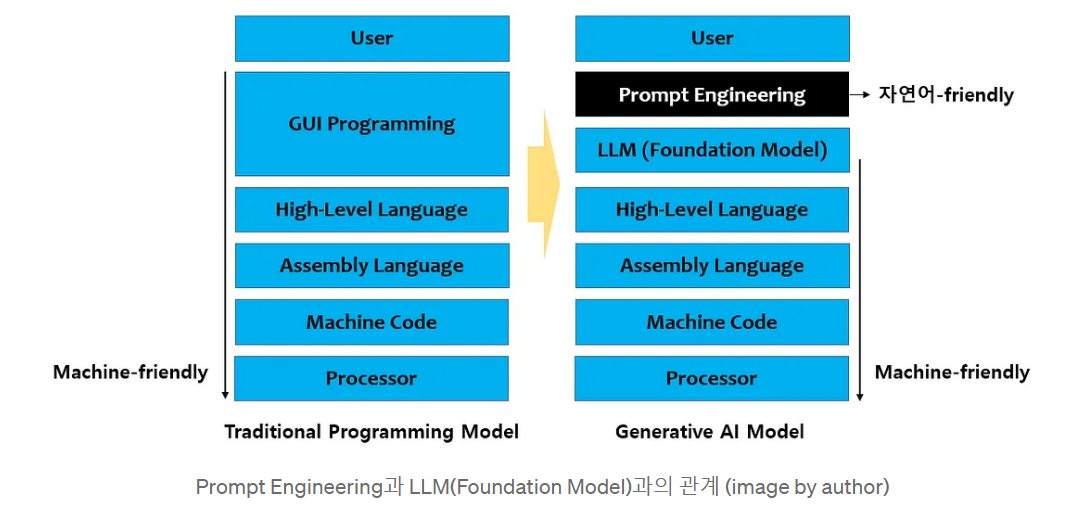

## Prompt Engineering vs Prompt Tuning
- 프롬프트 엔지니어링과 프롬프트 튜닝은 AI 성능과 출력을 최적화하기 위한 보완적 접근 방식으로 두 방식 모두 사용자와 AI 간 상호 작용을 개선하는데 중점을 두고 있다.
- 프롬프트 튜닝과 프롬프트 엔지니어링의 주요 차이점은 프롬프트 튜닝이 더 자동화된다는 것이다.
  - 프롬프트 튜닝을 사용하면 사용자가 프롬프트를 제공하기만 하면 LLM이 나머지 작업을 수행한다.
  - 프롬프트 엔지니어링을 사용하면 사용자가 직접 프롬프트를 설계해야 하므로 더 많은 시간이 소요될 수 있다.

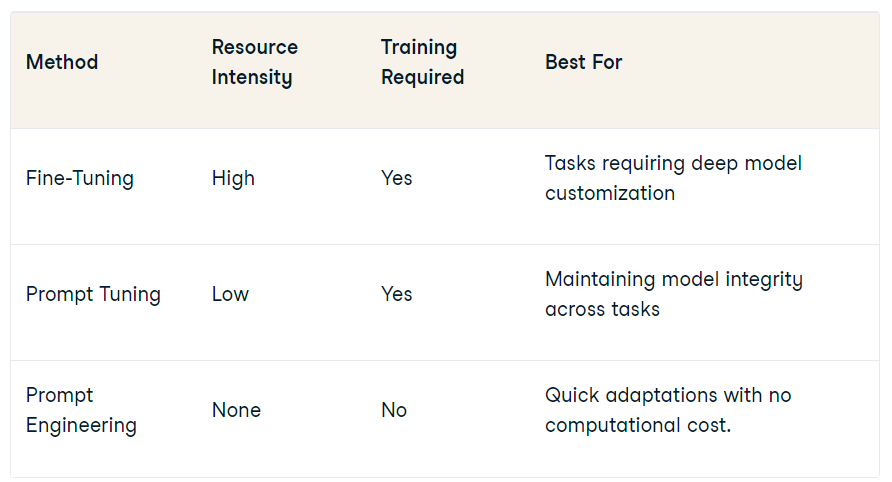

## 프롬프트 엔지니어링과 프롬프트 튜닝의 장단점
- 프롬프트 엔지니어링
  - 장점: 프롬프트 엔지니어링은 출력을 더 많이 제어할 수 있기 때문에 프롬프트 튜닝보다 좀더 효과적이다.
  - 단점: 프롬프트 엔지니어링은 사람의 입력이 더 많이 필요하기 때문에 프롬프트 튜닝보다 더 많은 시간이 소요된다.
- 프롬프트 튜닝
  - 장점: 프롬프트 튜닝은 더 자동화되어 있기 때문에 프롬프트 엔지니어링보다 빠르고 쉽다.
  - 단점: 프롬프트 튜닝은 출력에 대한 많은 제어를 허용하지 않기 때문에 프롬프트 엔지니어링보다 덜 효과적이다.

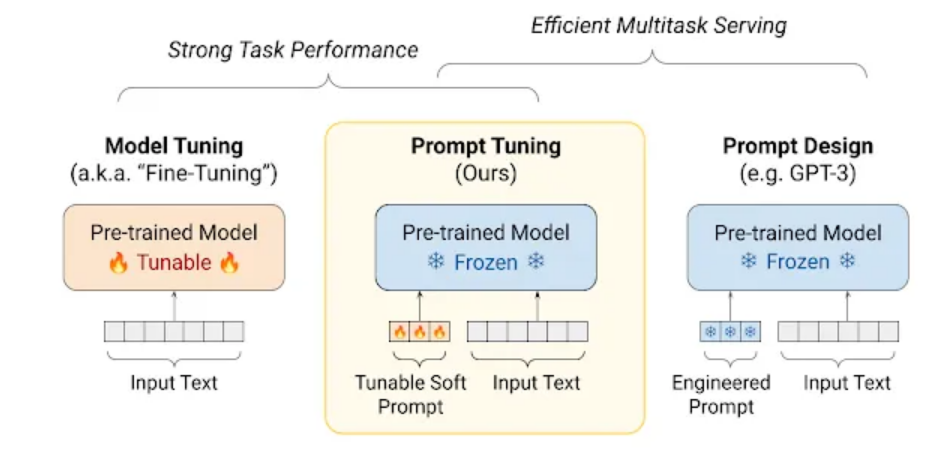

# [예제](https://blog.kubwa.co.kr/peft-%ED%9A%A8%EC%9C%A8%EC%A0%81-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8C%8C%EC%9D%B8-%ED%8A%9C%EB%8B%9D-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%84%B1%EB%8A%A5-%EC%B5%9C%EC%A0%81%ED%99%94-%ED%94%84%EB%A1%AC%ED%94%84%ED%8A%B8-%ED%8A%9C%EB%8B%9D-%EB%94%A5%EB%8B%A4%EC%9D%B4%EB%B8%8C-573339ea21b2)

## Setup

In [ ]:
!pip install -q peft==0.4.0 transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.0 MB/s eta 0:00:00


In [ ]:
# 트랜스포머 라이브러리에서 사용할 클래스, 기능 가져오기
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer, DataCollatorForLanguageModeling

# 데이터셋 라이브러리
from datasets import load_dataset

# peft 라이브러리
from peft import get_peft_model, PromptTuningConfig, TaskType, PromptTuningInit, PeftModel, PeftConfig

# huggingface_hub 라이브러리
from huggingface_hub import notebook_login

import os
import time

## [Model](https://huggingface.co/bigscience/bloomz)
- 텍스트 생성 위한 foundation casual LM로 bloomz 모델을 사용하겠습니다.
- 이 모델은 다국어 데이터셋에서 학습이 되었습니다.

In [ ]:
#사용할 사전 학습 모델 지정
model_name = "bigscience/bloomz-560m"

#사전 학습 모델에 사용할 tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

#지정한 모델 이름 사용해 사전 학습된 casual LM 로드
foundation_model = AutoModelForCausalLM.from_pretrained(model_name)

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

## 파인 튜닝 전
- 파인튜닝을 하기 전, 모델에게 다음 입력 문장에 대해 새로운 구절 생성하도록 요청해 보겠습니다.

In [ ]:
# 지정된 토크나이저 사용해 입력 텍스트 토큰화
input1 = tokenizer("Two things are infinite:", return_tensors = "pt", padding = True)

# input_ids와 attention_mask 기반해 사전 학습된 파운데이션 모델 사용해 텍스트 생성 요청
foundation_outputs = foundation_model.generate(
 input_ids = input1["input_ids"],
    attention_mask = input1["attention_mask"],
    max_new_tokens = 7,
    eos_token_id = tokenizer.eos_token_id
    )

# 생성된 token id를 사람이 읽을 수 있는 텍스트로 디코딩
decoded_output = tokenizer.batch_decode(foundation_outputs, skip_special_tokens = True)

# 디코딩된 텍스트 출력(생성된 결과물 사람이 읽을 수 있는 형태로 출력)
print(decoded_output)

['Two things are infinite: time and space']


## 파인 튜닝 - PromptTuningInit.RANDOM

### Load Dataset
- bloomz이 사전 학습한 데이터셋에는 영감을 주는 영어 명언에 관한 내용이 없었습니다.
- 따라서, bloom-560 모델을 [Abirate/english_quotes](https://huggingface.co/datasets/Abirate/english_quotes)라고 하는 데이터셋에 파인 튜닝을 해보려고 합니다.

In [ ]:
# dataset 라이브러리 내 load_dataset 기능 활용해 "english_quotes" 데이터셋 가져오기
data = load_dataset("Abirate/english_quotes")

# 지정된 토크나이저 활용해 데이터셋 명언 토큰화
data = data.map(lambda samples:tokenizer(samples["quote"]), batched = True)

# 훈련 샘플 일부 선택(처음 50개)
train_sample = data["train"].select(range(50))

# train_sample 출력해보기
display(train_sample)

Generating train split:   0%|          | 0/2508 [00:00<?, ? examples/s]

Map:   0%|          | 0/2508 [00:00<?, ? examples/s]

Dataset({
    features: ['quote', 'author', 'tags', 'input_ids', 'attention_mask'],
    num_rows: 50
})

In [ ]:
# data train 개수
data['train'].shape

(2508, 5)

In [ ]:
# quotes 상위 10개 조회
data['train']['quote'][:10]

['“Be yourself; everyone else is already taken.”',
 "“I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”",
 "“Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.”",
 '“So many books, so little time.”',
 '“A room without books is like a body without a soul.”',
 "“Be who you are and say what you feel, because those who mind don't matter, and those who matter don't mind.”",
 "“You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.”",
 "“You know you're in love when you can't fall asleep because reality is finally better than your dreams.”",
 '“You only live once, but if you do it right, once is enough.”',
 '“Be the change that you wish to see in the world.”']

In [ ]:
# author 상위 10개 조회
data['train']['author'][:10]

['Oscar Wilde',
 'Marilyn Monroe',
 'Albert Einstein',
 'Frank Zappa',
 'Marcus Tullius Cicero',
 'Bernard M. Baruch',
 'William W. Purkey',
 'Dr. Seuss',
 'Mae West',
 'Mahatma Gandhi']

In [ ]:
# tags 상위 10개 조회
data['train']['tags'][:10]

[['be-yourself',
  'gilbert-perreira',
  'honesty',
  'inspirational',
  'misattributed-oscar-wilde',
  'quote-investigator'],
 ['best', 'life', 'love', 'mistakes', 'out-of-control', 'truth', 'worst'],
 ['human-nature',
  'humor',
  'infinity',
  'philosophy',
  'science',
  'stupidity',
  'universe'],
 ['books', 'humor'],
 ['books', 'simile', 'soul'],
 ['ataraxy',
  'be-yourself',
  'confidence',
  'fitting-in',
  'individuality',
  'misattributed-dr-seuss',
  'those-who-matter'],
 ['dance', 'heaven', 'hurt', 'inspirational', 'life', 'love', 'sing'],
 ['dreams', 'love', 'reality', 'sleep'],
 ['humor', 'life'],
 ['action', 'change', 'inspirational', 'philosophy', 'wish']]

### PromptTuningConfig
- 프롬프트 튜닝은 soft prompts 혹은 가상 토큰(virtual token)의 random(무작위)과 initialization(초기화)가 모두 가능한데요.
- virtual prompt의 길이만 제공해 이제 random initialization(랜덤 초기화)를 진행해보겠습니다.

In [ ]:
# PromptTuningConfig 클래스 사용해 프롬프트 튜닝 Config 생성
peft_config = PromptTuningConfig(
    task_type = TaskType.CAUSAL_LM,
    # prompt_tuning_init -> soft prompts의 random과 initialization
    prompt_tuning_init = PromptTuningInit.RANDOM,
    # num_virtual_tokens -> soft prompts(virtual token)의 수
    num_virtual_tokens = 4,
    tokenizer_name_or_path = model_name
)

# 지정한 파운데이션 모델과 프롬프트 튜닝 Config 사용해 PeftModel 가져오기
peft_model = get_peft_model(foundation_model, peft_config)

# 학습 가능한 PeftModel의 파라미터 출력
print(peft_model.print_trainable_parameters())

trainable params: 4,096 || all params: 559,218,688 || trainable%: 0.0007324504863471229
None


### TrainingArguments

In [ ]:
# 디렉토리 생성
!%mkdir/content/working_dir

# Peft 모델 결과물 저장하기 위한 디렉토리 지정
output_directory = os.path.join("/working_dir", "peft_outputs")

# 작업 디렉토리 존재하지 않는다면, 생성하기
if not os.path.exists("/working_dir"):
 os.mkdir("/working_dir")

# output 디렉터토리 존재하지 않는다면, 생성
if not os.path.exists(output_directory):
 os.mkdir(output_directory)

/bin/bash: line 1: fg: no job control


In [ ]:
# Peft 모델에 대한 훈련 요소 정의
training_args = TrainingArguments(
    output_dir = output_directory, # 모델 예측과 체크포인트 저장 위치
    no_cuda = True,               # GPU 클러스터 사용에 필요
    auto_find_batch_size = True,  # 자동으로 메모리에 맞는 최적의 batch size 탐색
    learning_rate = 3e-2,         # 전체 파인튜닝할 때보다 학습률 높게 설정
    num_train_epochs = 5          # 전체 파인 튜닝 데이터셋이 몇 번에 나눠서 통과하는 횟수
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1489: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


### Training
- DataCollatorForLanguageModeling
  - 입력의 크기가 다양할 수 있기 때문에 입력을 배치의 최대 길이로 패딩해서 진행합니다.

In [ ]:
# Peft 모델 configuration에서 gradient checkpoint 활성화
peft_model.config.gradient_checkpointing = True

# Peft 모델 학습하기 위한 Trainer 인스턴스 생성
trainer = Trainer(
    model = peft_model,           # peft 버전 기본 모델인 bloomz-560M 전달
    args = training_args,         # 위에서 정의한 출력 디렉터리, GPU 사용, 배치 크기 등
    train_dataset = train_sample, # 학습 데이터
    data_collator = DataCollatorForLanguageModeling(tokenizer, mlm = False) #False: 마스크된 LM 사용하지 않음
)

# 학습 시작
trainer.train()

Step,Training Loss


TrainOutput(global_step=35, training_loss=3.5220681326729912, metrics={'train_runtime': 223.4483, 'train_samples_per_second': 1.119, 'train_steps_per_second': 0.157, 'total_flos': 58134880665600.0, 'train_loss': 3.5220681326729912, 'epoch': 5.0})

### Save Trained Model

In [ ]:
# Peft 모델 경로 생성하는 현재 시간 기록
time_now = time.time()

# output_directory와 timestamp 사용해 Peft 모델 저장할 경로 생성
peft_model_path = os.path.join(output_directory, f"peft_model_{time_now}")

# 원하는 경로에 학습된 Peft 모델 저장
trainer.model.save_pretrained(peft_model_path)

### Load Saved Model

In [ ]:
# PeftModel 클래스를 사용해 학습된 Peft 모델 불러오기
loaded_model = PeftModel.from_pretrained(
    foundation_model,    # 프롬프트 튜닝에 사용될 기본 모델
    peft_model_path,     # Peft 모델이 저장된 위치
    is_trainable = False # 불러온 모델은 훈련될 필요 없음
)

### Inference

In [ ]:
# input_id, attention_mask에 기반해 불러온 Peft 모델을 사용해 텍스트 생성
loaded_model_outputs = loaded_model.generate(
    input_ids = input1["input_ids"],
    attention_mask = input1["attention_mask"],
    #max_nex_tokens = 7,
    eos_token_id = tokenizer.eos_token_id
)

# 생성된 토큰 id를 사람이 읽을 수 있는 텍스트로 디코딩
decoded_output = tokenizer.batch_decode(loaded_model_outputs, skip_special_tokens = True)

# 디코딩된 결과물 출력
print(decoded_output)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['Two things are infinite: the number of people and the number of things. The number of people is']


## 파인튜닝 - PromptTuningInit.TEXT

### PromptTuningConfig

In [ ]:
# PromptTuningConfig 클래스 활용해 텍스트 기반 프롬프트 튜닝 configuration 생성
text_peft_config = PromptTuningConfig(
    task_type = TaskType.CAUSAL_LM,
    prompt_tuning_init = PromptTuningInit.TEXT,
    prompt_tuning_init_text = "Generate inspirational quotes", # 모델이 최적의 임베딩 찾을 수 있게 시작점 제공
    num_virtual_tokens = 3,         # prompt_tuning_init_text 길이에 맞출 필요 없음
    tokenizer_name_or_path = model_name
)

# 파운데이션 모델과 텍스트 기반 프롬프트 튜닝 configuration 활용해 PeftModel 불러오기
text_peft_model = get_peft_model(foundation_model, text_peft_config)

# 텍스트 기반 PeftModel의 훈련 가능한 파라미터 수 출력
print(text_peft_model.print_trainable_parameters())

trainable params: 3,072 || all params: 559,217,664 || trainable%: 0.0005493388706691496
None


### Training

In [ ]:
# 텍스트 기반 Peft 모델 학습시키기 위한 Trainer 생성
text_trainer = Trainer(
    model = text_peft_model, # 텍스트 기반 Peft 기본 모델
    args = training_args,    # 위에서 정의한 출력 디렉터리, GPU 사용량, 배치 크기 등
    train_dataset = train_sample,   # 훈련 데이터셋
    data_collator = DataCollatorForLanguageModeling(tokenizer, mlm = False) #False: 마스크된 LM 사용하지 않음
)

# 텍스트 기반 Peft 모델 학습 시작
text_trainer.train()

Step,Training Loss


TrainOutput(global_step=35, training_loss=3.0007860456194195, metrics={'train_runtime': 234.4955, 'train_samples_per_second': 1.066, 'train_steps_per_second': 0.149, 'total_flos': 58134880665600.0, 'train_loss': 3.0007860456194195, 'epoch': 5.0})

### Save Trained Model

In [ ]:
# 모델 저장
time_now = time.time()
text_peft_model_path = os.path.join(output_directory, f"text_peft_model_{time_now}")
text_trainer.model.save_pretrained(text_peft_model_path)

### Load Saved Model

In [ ]:
# 모델 가져오기
loaded_text_model = PeftModel.from_pretrained(
 foundation_model,
    text_peft_model_path,
    is_trainable = False
)

### Infterence

In [ ]:
# 출력 생성
text_outputs = text_peft_model.generate(
    input_ids = input1["input_ids"],
    attention_mask = input1["attention_mask"],
    #max_nex_tokens = 7,
    eos_token_id = tokenizer.eos_token_id
)

print(tokenizer.batch_decode(text_outputs, skip_special_tokens = True))

['Two things are infinite: the number of people and the number of things. The number of people is']
